<a href="https://colab.research.google.com/github/Arjun-A-Pathak/Company-classification/blob/main/Arjun_Pathak_Company_classification_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
working_dir_path = '//content/drive/MyDrive/data_company_classification.csv'
df = pd.read_csv(working_dir_path)
df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [ ]:
df.shape

(73974, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


##EDA

In [ ]:
# null value analysis in each column
df.isnull().sum()

website                 0
company_name            0
homepage_text         669
h1                  27321
h2                  20762
h3                  29315
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

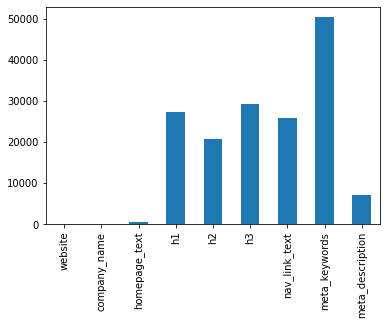

In [ ]:

df.isnull().sum().plot.bar()

In [ ]:
# making a new column by combining h1,h2,h3

df['headings'] = df['h1'].fillna('') + ' ' +df['h2'].fillna('') + ' ' + df['h3'].fillna('')

In [ ]:
#dropping indivisual headings columns
df.drop(['h1','h2','h3'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'nav_link_text',
       'meta_keywords', 'meta_description', 'headings'],
      dtype='object')

In [ ]:
#now checking null values in rest columns
df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum()

homepage_text         669
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

In [ ]:
#getting null value distribtuion row wise
df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In [ ]:
# making a column which has the count of null values in these four columns : 'homepage_text', 'nav_link_text','meta_keywords', 'meta_description'
df['null_count'] = df[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1)

In [ ]:
# getting the rows with more than three missing values out of the four columns mentioned above
df = df[df['null_count']<3]

df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(70650, 8)

In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'nav_link_text',
       'meta_keywords', 'meta_description', 'headings', 'null_count'],
      dtype='object')

In [ ]:
#dropping the 'null_count' column
df.drop('null_count', axis=1, inplace=True)

In [ ]:
#ReplacING null values with empty strings
df.fillna('', inplace=True)

In [ ]:
#making single columns with all text information, Separated by space

df['text'] = df['homepage_text'] + ' ' + df['nav_link_text'] + ' ' + df['meta_keywords'] + ' ' + df['meta_description'] + ' ' + df['headings']

In [ ]:
#Columns to keep.
data = df[['website', 'company_name', 'text']]

##Checking for special characters

In [ ]:
s = 'abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ'
specials = set()

In [ ]:
for text in df['text']:
    for c in text:
        if c not in s:
            specials.add(c)

In [ ]:
for special in specials:
    print(special[:2000])

Streaming output truncated to the last 5000 lines.
ಓ
找
陋
贺

:
坪
连
妬
み
ಾ
余
ʊ

旋
་
์
作
🍊
ק
范
ੋ
❭
辅

ስ
선
ਸ
◄
巫
💁
✈
乳
剩
해
🇴
우
娥
ಬ
俄
但
贫
洪
ή
獲

殖
肋
睛
려
卫
飲

ൂ
ल
汰
麗
衡

⦁

ʟ
ख़
ὲ
준
🎃
疆
╳
婷

🛒


È
汪
ů
⟶
浓

纸
共
吁
↗
态
•
愛
勋
¸
〕
薪
ነ
날
̉
扬
받
访
☞
⋮

畜
🚙
သ
ြ
穷
စ
聡
☎
赠
遗
⚾
🦕
又
钨
𝐇

🙋
線

稀
灯
ੌ
迫
ਚ
團
削
梁
带
ழ
💦
州
ؤ

🌃
々
❣
克
负
て

路

编

椿
綺
晖
_
🍏
₵
Ο
ී
歌
隨
町
ル
記

💧
審
碼
猫
粤
✢

バ
庞
ゴ

义
浒
青
ミ
浮

𝗷
椅
х
呑
昌
℗
效
賃
ễ
橡
;
ﾉ
ި
❄
圾
讲

ள
⁽
መ
杞
œ
议
ɪ
冊
浴
ལ
你
📷
赤
慈
證
期

鍋
🏋

艾
穿
✘
감
🙃
셔
滈
樹
龙
ט
莲

胴
ų

ಎ
盲
祭
ノ

寶
轰
陞

勞
哮
♦
―
舰

ψ
姬
電
➢

獎
制
η
捞
卜
般
Ṃ
𝐑
ൾ



പ
珊
화
寻
【
▴

岗
湃
割
⇐
乾
완
波
⊱
💩
土
受
橋
않
肺

⨉
ỉ
ὶ
！
🍷
席
他
傷
😕
发
擴

统
臻
鮎

屈

舊
淫

碣

箱
🐠
ം
将
₪
ạ

패
른
𝗣

식
河
難
実
頻
ｗ
炬

面
💍

查
임
课
間
抖
🎊
➀
境
滥
納

邦
眉
務
െ
̷
☂

巨
霆
隊
炎
拍
沟
ာ


用
启
脆
掌
இ

威
ꜱ
आ
东
罩
ὄ
况
어
览
⋯
А
🏖
厄
ᴠ
ầ
ἦ
处
距

瘤
ភ
»
軟
栽
૧
雯
烤
鬆
ὸ
失
烽
ﾆ
🇹
則
ः
添
材

挖
🎾
Û
『
抱
ĺ
胺
隠
ฮ
▲
寸
輪
̋
屏

ਿ
换
递
客
愈
亭
虫
🚘
ᴅ
鹏
慕
軽
玻
铝
弃
я
途

瑚
妇

例
芬
吃
ブ
靓
湯
Ф
※
继
截
ę
ผ
卦
🔊
界
🤩
遇
Ō
📞
ｕ
扣
御
悠
🖌
曼
ْ
⁣
𝗡
멍
睁


獨
匯
Я
贸
ޭ
摄
冀

👂
⌘
ܼ

##Text cleaning

In [ ]:
import string
import unicodedata as ud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# this function removes emojis and also converts visually similar characters to normat Lating characters
def to_unicode(text):
    return ud.normalize('NFD', text).encode('ascii','ignore').decode('utf-8')

# function to remove punctuations
def remove_punctuation(text):
    text = text.lower()
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)


stop_words = stopwords.words('english')
stop_words.extend(['contact','us'])

# function to remove stopwords
def remove_stopwords(text):
    lst = [word for word in text.split() if word not in stop_words]
    return ' '.join(lst)

# we also need to remove numbers from the text
def remove_number(text):
    return ''.join([i for i in text if not i.isdigit()])

stemmer = SnowballStemmer('english')

# function for stemming
def stemming(text):
    lst_ = [stemmer.stem(word) for word in text.split()]
    return " ".join(lst_)

In [ ]:
# function for cleaning text
def clean_text(text):
    text = to_unicode(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_number(text)
    text = stemming(text)

    return text

In [ ]:
# cleaning the text column
data['text'] = data['text'].apply(clean_text)

In [ ]:
data.columns

Index(['website', 'company_name', 'text'], dtype='object')

In [ ]:
data.shape

(70650, 3)

In [ ]:
data.head()

,website,company_name,text
0,bipelectric.com,bip dipietro electric inc,electrician electr contractor serv vero beach ...
1,eliasmedical.com,elias medical,site map en espanol elia medic home skin care ...
2,koopsoverheaddoors.com,koops overhead doors,home garag door repair servic designadoor gara...
3,midtowneyes.com,midtown eyecare,type size home practic servic patient form eye...
4,reprosecurity.co.uk,repro security ltd,simpli fill form back touch arrang free oblig ...


In [ ]:
data['text'].shape

(70650,)

##Vectorization

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# creating vectorizer object
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.02)

In [ ]:
X = vectorizer.fit_transform(data['text'])

In [ ]:
X.shape

(70650, 1734)

##Making Clusters

In [ ]:
from kmeanstf import KMeansTF
from scipy.spatial.distance import cdist

In [ ]:
type(X)


scipy.sparse.csr.csr_matrix

In [ ]:
X = X.toarray()

##Deciding the number of Clusters


In [ ]:
# Within Cluster sum of Squares score
# for determining the right number of clusters
distortions = []

##Kmeans clustering

In [ ]:
K = range(2,15)
for k in K:
    model = KMeansTF(n_clusters=k, random_state=42)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

matrix too large for GPU: bytes 4,410,255,600, k=9 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,205,127,800, k=9 n=35,325 d=1734 numsize=4, max_mem=4,410,255,599
matrix too large for GPU: bytes 4,900,284,000, k=10 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,450,142,000, k=10 n=35,325 d=1734 numsize=4, max_mem=4,900,283,999
matrix too large for GPU: bytes 5,390,312,400, k=11 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,695,156,200, k=11 n=35,325 d=1734 numsize=4, max_mem=5,390,312,399
matrix too large for GPU: bytes 5,880,340,800, k=12 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction

In [ ]:
len(distortions)

13

###showing the optimal K using Elbow method

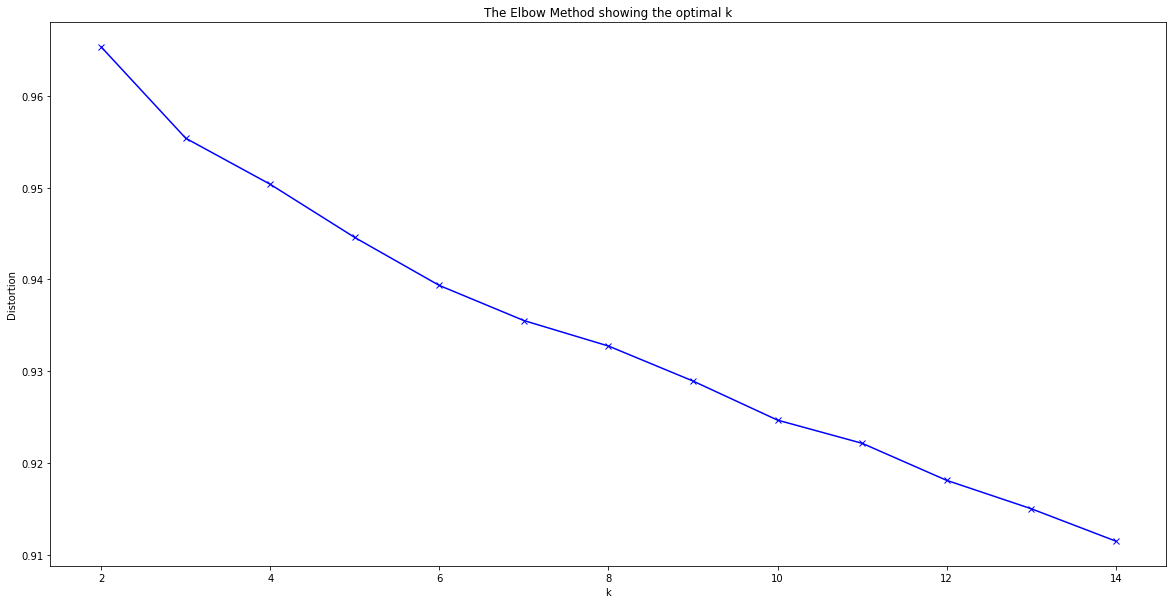

In [ ]:
# Plot the elbow
plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###Applying Silhouette Score

In [ ]:
 from sklearn.metrics import silhouette_score

In [ ]:
def sample_silhoutte_score(X, y, ratio=0.1):
    # getting number of clusters
    k = max(y)+1

    # create a dictionary where keys are cluster label
    # and values are list of indices of the points alotted to the label
    cluster_dict = {i:np.where(y==i)[0] for i in range(k)}

    # creating samples
    y_sample = []
    X_sample = []

    for i in cluster_dict.keys():
        sample_size = int(cluster_dict[i].shape[0]*ratio)
        indexes = np.random.choice(a=cluster_dict[i], size=sample_size)
        sample = np.take(a=X, indices=indexes, axis=0)
        labels = [i]*sample_size
        y_sample.extend(labels)
        X_sample.extend(sample)

    return silhouette_score(np.array(X_sample), y_sample)

In [ ]:
scores = []

for k in range(2,15):
    model = KMeansTF(n_clusters=k, random_state=42)
    y = model.fit_predict(X)
    # taking 30% ratio
    score = sample_silhoutte_score(X, y, ratio=0.3)
    scores.append(score)

matrix too large for GPU: bytes 4,900,284,000, k=10 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,450,142,000, k=10 n=35,325 d=1734 numsize=4, max_mem=4,900,283,999
matrix too large for GPU: bytes 5,390,312,400, k=11 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,695,156,200, k=11 n=35,325 d=1734 numsize=4, max_mem=5,390,312,399
matrix too large for GPU: bytes 5,880,340,800, k=12 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,940,170,400, k=12 n=35,325 d=1734 numsize=4, max_mem=5,880,340,799
fraction matrix too large for GPU: bytes 1,960,113,600, k=12 n=23,550 d=1734 numsize=4, max_mem=2,646,153,360
matrix too large for GPU: bytes 6,370,369,200, k=13 n=70,650 d

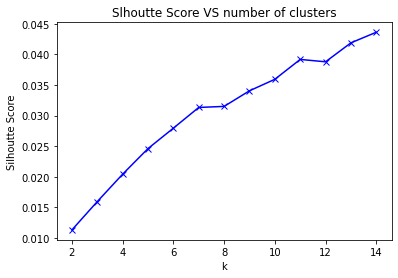

In [ ]:
plt.plot(range(2,15), scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte Score')
plt.title('Slhoutte Score VS number of clusters')
plt.show()

##Let's Make 12 Clusters

In [ ]:
kmeanstf = KMeansTF(n_clusters=12, random_state=42)

In [ ]:
y = kmeanstf.fit_predict(X)

matrix too large for GPU: bytes 5,880,340,800, k=12 n=70,650 d=1734 numsize=4, max_mem=7,779,319,808
automated slicing started
set 'verbose' to 1 to see more details
fraction matrix too large for GPU: bytes 2,940,170,400, k=12 n=35,325 d=1734 numsize=4, max_mem=5,880,340,799
fraction matrix too large for GPU: bytes 1,960,113,600, k=12 n=23,550 d=1734 numsize=4, max_mem=2,646,153,360


In [ ]:
y = np.array(y)

In [ ]:
labels, freqs = np.unique(y, return_counts=True)
cluster_df = pd.DataFrame({'Cluster':labels, 'Frequency':freqs})

cluster_df

,Cluster,Frequency
0,0,1470
1,1,9258
2,2,2268
3,3,4348
4,4,3300
5,5,4399
6,6,4274
7,7,4922
8,8,1307
9,9,31240


In [ ]:
data['label'] = y

###Collect the text for all 12 clusters

In [ ]:
text = []

for i in range(12):
    df_ = data[data['label']==i]
    text.append(' '.join(list(df_['text'])))

In [ ]:
del df_

In [ ]:
y = pd.DataFrame({'Labels':y})

In [ ]:
y = np.array(y['Labels'])

In [ ]:
y

array([10,  5,  9, ...,  9,  9,  9])

In [ ]:
len(text)

12

In [ ]:
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from wordcloud import WordCloud

In [ ]:
# fucntion to create wordcloud
def word_cloud(text):
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

##Explore the clusters

In [ ]:
labels=[]

In [ ]:
df['labels'] = y

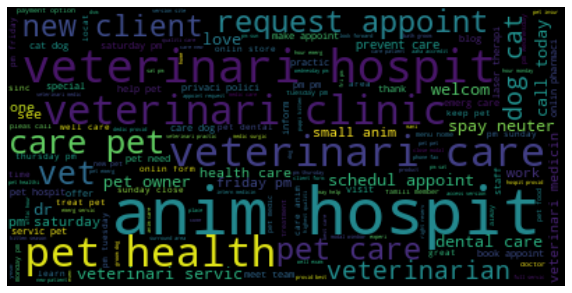

In [ ]:
word_cloud(text[0])

In [ ]:
labels.append('Pet Healthcare')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==0].index), 5),:]['homepage_text']:
    print(s)

                        Main Menu      Home Equine Small Animal Referral Stud Services News & Events Client Info Products Contact      Search ...                           24hr Emergency  Small Animal: 01572 722 646  24hr Emergency  Farm & Equine: 01572 722 647                      Welcome  Oakham veterinary Hospital is a long established practice on the outskirts of Oakham, Rutland            Caring for your Best Friend  From vaccinations, flea and tick treatment, to complex surgery our dedicated team will keep your pet in the best of health            Tier 3 Hospital Status  Accredited by the Royal College of Veterinary Surgeons. We have a clinical association with the University of Nottingham School of Veterinary Medicine and Science giving us access to expertise from leading specialists.                 Cat friendly clinic gold level status  As a practice we have relevant knowledge and equipment to manage the care of all cats at the highest level.             One of the UK's leadin

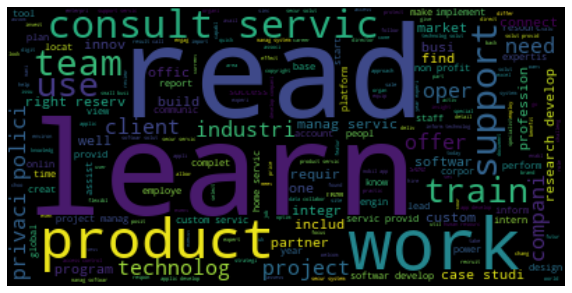

In [ ]:
word_cloud(text[1])

In [ ]:
labels.append('IT Services')

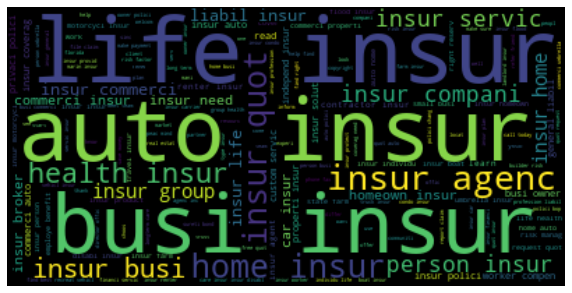

In [ ]:
word_cloud(text[2])

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==2].index), 5),:]['homepage_text']:
    print(s)

Quick Quotes Car Insurance Quote Homeowner Insurance Quote Life Insurance Quote Business Insurance Quote Ellis, Moreland & Ellis, Inc 315-488-1303 Facebook Twitter LinkedIn Yelp 2005 West Genesee St. Syracuse, NY 13219 At Ellis, Moreland & Ellis, we're focused on you. We have your best interests in mind & provide the highest level of customer service. Contact us or simply request an insurance quote online . Affordable, Reliable Insurance Choices Ellis, Moreland & Ellis is located in Syracuse, NY although our clients are located all over Central New York. Serving our clients is our priority because our business exists only as a result of their patronage. We work hard to be sure our clients are properly insured at a fair premium. We will help you find the right combination of tailored, personalized insurance coverage at just the right price to fit your needs. Our Insurance Partners We work with trusted companies like Featured Video Emergency Preparedness How Taking a Home Inventory Can H

In [ ]:
labels.append('Insurance')

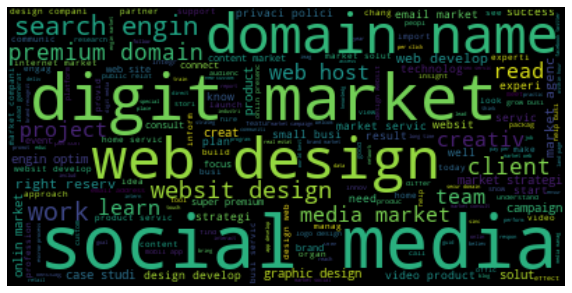

In [ ]:
word_cloud(text[3])

In [ ]:
labels.append('Digital Marketing')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==3].index), 5),:]['homepage_text']:
    print(s)

                                   You have successfully subscribed to the SND Newsletter!          Toggle navigation  subject         Solutions keyboard_arrow_down   SND Dashboard  SND Campaigns Manager  SND On Air  SND Reports    Innovation  Blog  About  Contact  Login           close  Solutions keyboard_arrow_down   SND Dashboard  SND Campaigns Manager  SND On Air  SND Reports    Innovation  Blog  About  Contact  Login    SCHEDULE DEMO  LOG IN    Follow us on:                     The Premiere Social Media Solution for Newsrooms.   Schedule A Demo         Revenue Tools that Pay Off.   Schedule A Demo         1-2-3, Take Social to TV.   Schedule A Demo         Made For News People by News People.   Schedule A Demo         Innovative Ideas that Make Money.   Schedule A Demo        Find out how we can help you.  SCHEDULE A DEMO   keyboard_arrow_down             GIVING YOU THE LEAD IN ANY TYPE OF NEWSROOM  Get everyone in the newsroom on board with social media tools built just for them.

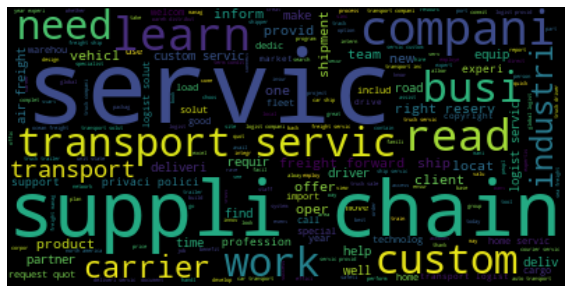

In [ ]:
word_cloud(text[4])

In [ ]:
labels.append('Logistics')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==4].index), 5),:]['homepage_text']:
    print(s)

  My Account  Get a Quote  843-216-2627 X My Account  Sign In  Register a New Account    Home Limo Service Wedding Transportation Long Distance Transportation Airport Shuttle CHS Airport to Wild Dunes Charleston Executive Airport Kiawah and Seabrook Celebrity Transportation Medical and Senior Care Transportation Party Bus Rental Bachelor Parties Bachelorette Party Concerts and Festivals Brewery Tours Charleston Tours Sporting Events Charleston Proms Party Bus Photos Birthday Parties Fleet Book Now Blog Contact Concierge Services Request A Quote We Recommend Concierge Agent Signup Now Hiring    Limo Service in Charleston, SC CALL NOW Get A Quote Contact Us  My Account X My Account Sign In  Register a New Account  Limo Service in Charleston, SC Welcome to Charleston Black Cab, Charleston’s award-winning, locally owned limousine service. We pride ourselves on living in the #1 U.S. city as recognized by Condé Nast and Travel and Leisure. We embody the tradition of Southern hospitality by o

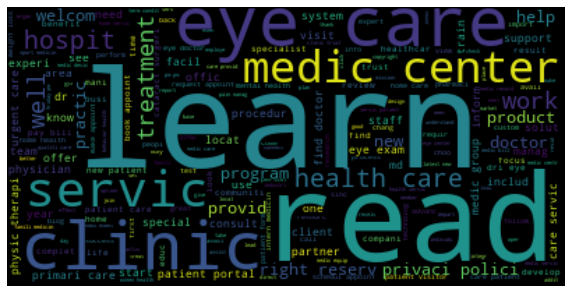

In [ ]:
word_cloud(text[5])

In [ ]:
labels.append('Eye Care')

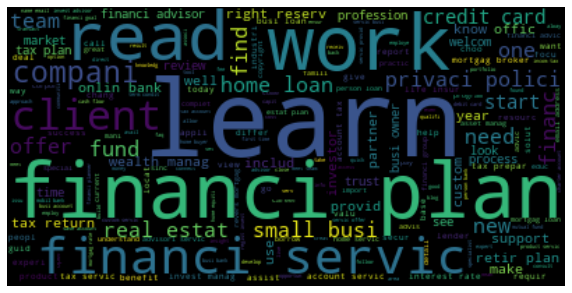

In [ ]:
word_cloud(text[6])

In [ ]:
labels.append('Finance')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==6].index), 5),:]['homepage_text']:
    print(s)

              Home    About Us      Careers >       Available Positions           Services      Retirement Planning      Employer Sponsored Retirement Plans      Life Insurance and Long-Term Care      Education Planning        People    Contact Us    Disclosures      Anti-Money Laundering Statement      Business Continuity Plan      Privacy Policy Notice      Securities Investor Protection Corporation (SIPC)      Other Important Disclosures                                           Our History​  Established in January of 1991 by Timothy J. Weitzel , Weitzel Financial Services, Inc. (WFS) is a Registered Investment Advisor and Independent Broker/Dealer in Dubuque, IA.  Over nearly three decades, WFS has continued to grow, adding additional representatives and expanding the reach of our services throughout the Tri-State area and beyond.     Our Difference  Since the very beginning, our priority at Weitzel Financial Services, Inc. (WFS) has been to help our clients reach their financial g

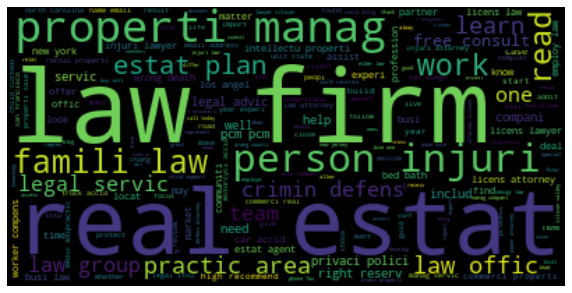

In [ ]:
word_cloud(text[7])

In [ ]:
labels.append('Real Estate and Legal')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==7].index), 5),:]['homepage_text']:
    print(s)

                          FREE CONSULTATION (626) 345-7210            Home  The Firm  Attorney  Practice Areas     Personal Injury  Business Law  Trust Litigation / Probate Litigation     Contesting Trust Amendments in California  What Is a Breach of Trust?    Workers’ Compensation    Blog  Contact Us              COMPLETE PROFESSIONAL LEGAL REPRESENTATION   THE ASLANIAN LAW FIRM, PC is a full service law firm dedicated to providing clients with competent, efficient and aggressive representation to achieve the most favorable results.  Request A FREE CONSULTATION        PRACTICE AREAS      PERSONAL INJURY   The Aslanian Law Firm can assist you with any personal injury matter whether large or small.  We assist clients dealing  with auto accidents, catastrophic injuries (including industrial accidents), traumatic brain injuries, dog bites, slip and falls and many other types of  …   Learn More   BUSINESS LAW   With years of experience handing business litigation matters, developing and ne

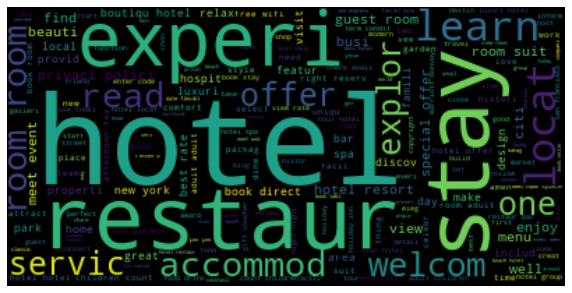

In [ ]:
word_cloud(text[8])

In [ ]:
labels.append('Hospitality')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==8].index), 5),:]['homepage_text']:
    print(s)

              Login ; Register ;          Menu         Book Now                      Login    Register                                  Hotel & Spa       Deluxe Room, King Bed    Deluxe Room, 2 Queen Beds    Deluxe Room, Suite    Spa    Packages        Casino        Slots    Table Games    Play Free Slots Online              Set sail with mychoice® and Norwegian Cruise Line           Dining        Journey Steakhouse    99 Hops House    Terrace Buffet    The Lucky Taco    Leo's Deli    Red Lotus Asian Kitchen    Zoe's Coffee Shop    VIP Lounge                     Calendar    Promotions     Meetings & Events        Weddings & Receptions                                     Login    Register                    Book Now                                                 Hotel  Dining            my choice Location/Resort:   Set Location      Colorado  Illinois  Indiana  Iowa  Louisiana  Maine  Mississippi  Missouri  Nevada  New Mexico  Pennsylvania  West Virginia       Set Department      Argos

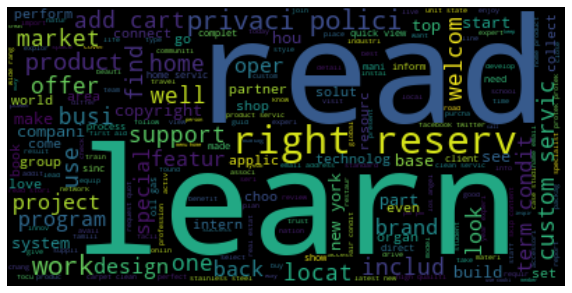

In [ ]:
word_cloud(text[9])

In [ ]:
labels.append('E Commerce')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==9].index), 5),:]['homepage_text']:
    print(s)

                                                                                 info@schmittyandsons.com  952.469.2256                            School Bus   Routes  School Bus Rules  School Bus Safety  School Bus FAQs    Charter Bus  Transit Bus  Equipment Sales  Employment   Mechanic  School Bus Driver  Transit Driver  Washer/Detailer  Non-CDL Opportunites    Contact Us  |             School Bus   Routes  School Bus Rules  School Bus Safety  School Bus FAQs    Charter Bus  Transit Bus  Equipment Sales  Employment   Mechanic  School Bus Driver  Transit Driver  Washer/Detailer  Non-CDL Opportunites    Contact Us  |                                               Now Hiring!  Explore the exciting opportunities with Schmitty & Sons by applying today! A  Career that is guaranteed to take you places.  Every Day.  Application Information Weather & School Closings Inclement Weather & School Closings Please consult the following websites for Lakeville ISD 194 school closings and inclement wea

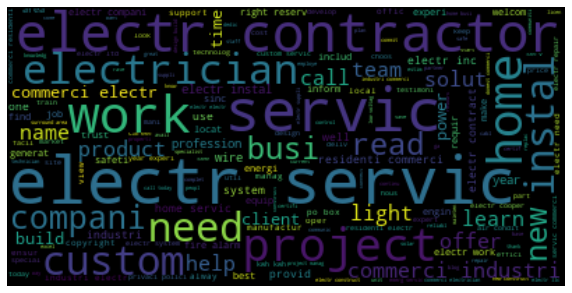

In [ ]:
word_cloud(text[10])

In [ ]:
labels.append('Home Service')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==10].index), 5),:]['homepage_text']:
    print(s)

              Electricians For Builders   Home About Us Electricians For Builders What we do How we do it Accreditations A Little More Service Guarantee We Commit to our Builders Client referral rewards Projects & Testimonials Past Projects Client Testimonials Allow us to quote Contact Us                      Commitment  to completing  projects Right and Fast while maintaining a safe, clean & tidy site...  Learn More     Electricians For Builders  Zenith Electrical Solutions understands that the electrical trade is a vast and varied field and..  Learn More     Projects  We'll show you our works!..  Learn More                Electricians For Builders     Zenith Electrical Solutions is an electrical contracting company   based on the Sunshine Coast. The company which was established in July   of 2002 by Nathan Woods, is still owned and operated by Nathan and his   wife Ambien.  Learn More         What we do     Zenith Electrical Solutions understands that the electrical trade is a   vast

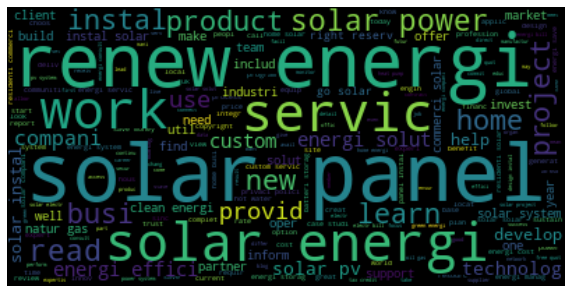

In [ ]:
word_cloud(text[11])

In [ ]:
labels.append('Renewable Energy')

In [ ]:
# look at some text samples of this cluster
for s in df.loc[random.sample(list(data[data['label']==11].index), 5),:]['homepage_text']:
    print(s)

888-322-8755 Home Who We Are Our History Energy Efficiency Management Energy Monitoring A/CÂ Savings Food Storage Savings Electric Motor Savings Office Comfort Solar Electricity Natural Gas Green Energy FAQs Referrals & Testimonies Contact us Comprehensive Energy Solutions Navigating your commercial energy options can be complicated, time consuming and a costly process. You need cost-effective options and true industry experts to guide you . Our philosophy is straightforward: keep things simple for all our clients.  Using our 35 years of industry experience, we bring you the top energy products at an affordable price. Call us today to schedule your personalized appointment Energy Solutions USA at Â Â Â Â Â Â Â Â Â Â 888-322-8755 Our Products and Services Electricity & Natural Gas Have questions concerning our company? Our resources? Cost-effective energy consumption? Energy Solutions USA has the answers you need! Check in our FAQ page for more. LEARN MORE... Energy Efficiency Managemen

In [ ]:
labels

['Pet Healthcare',
 'IT Services',
 'Insurance',
 'Digital Marketing',
 'Logistics',
 'Eye Care',
 'Finance',
 'Real Estate and Legal',
 'Hospitality',
 'E Commerce',
 'Home Service',
 'Renewable Energy']

In [ ]:
cluster_df['Cluster'] = labels

##The distribution of No of companies for each cluster

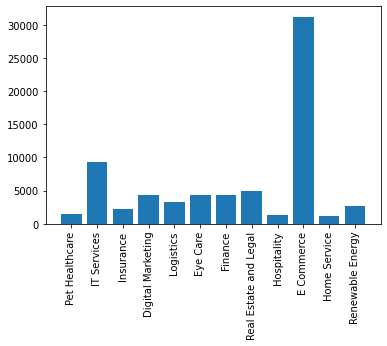

In [ ]:
plt.xticks(rotation=90)
plt.bar(labels, list(cluster_df['Frequency']))
plt.show()